In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13288.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/24201.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26556.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26076.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27577.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27973.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26452.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10162.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12768.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12551.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13205.jpg
/kaggle/input/face-expression-recognition-d

# Importing Libraries 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

2024-06-20 03:52:21.230328: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 03:52:21.230474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 03:52:21.386832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Locating My Directory For Proper Training

In [3]:
train_dir = '/kaggle/input/face-expression-recognition-dataset/images'
validation_dir = '/kaggle/input/face-expression-recognition-dataset/'

In [4]:
picture_size = 48
folder_path = "/kaggle/input/face-expression-recognition-dataset/images"

In [5]:
cd /kaggle/input/face-expression-recognition-dataset/images/train/angry

/kaggle/input/face-expression-recognition-dataset/images/train/angry


# Setting Dimention For The Images

In [6]:
# Image dimensions
img_width, img_height = 48, 48
input_shape = (img_width, img_height, 3)  # RGB images



# Initialize ImageDataGenerator objects for data preprocessing

In [7]:
# Parameters for ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Displaying Some of The Images In The Directory

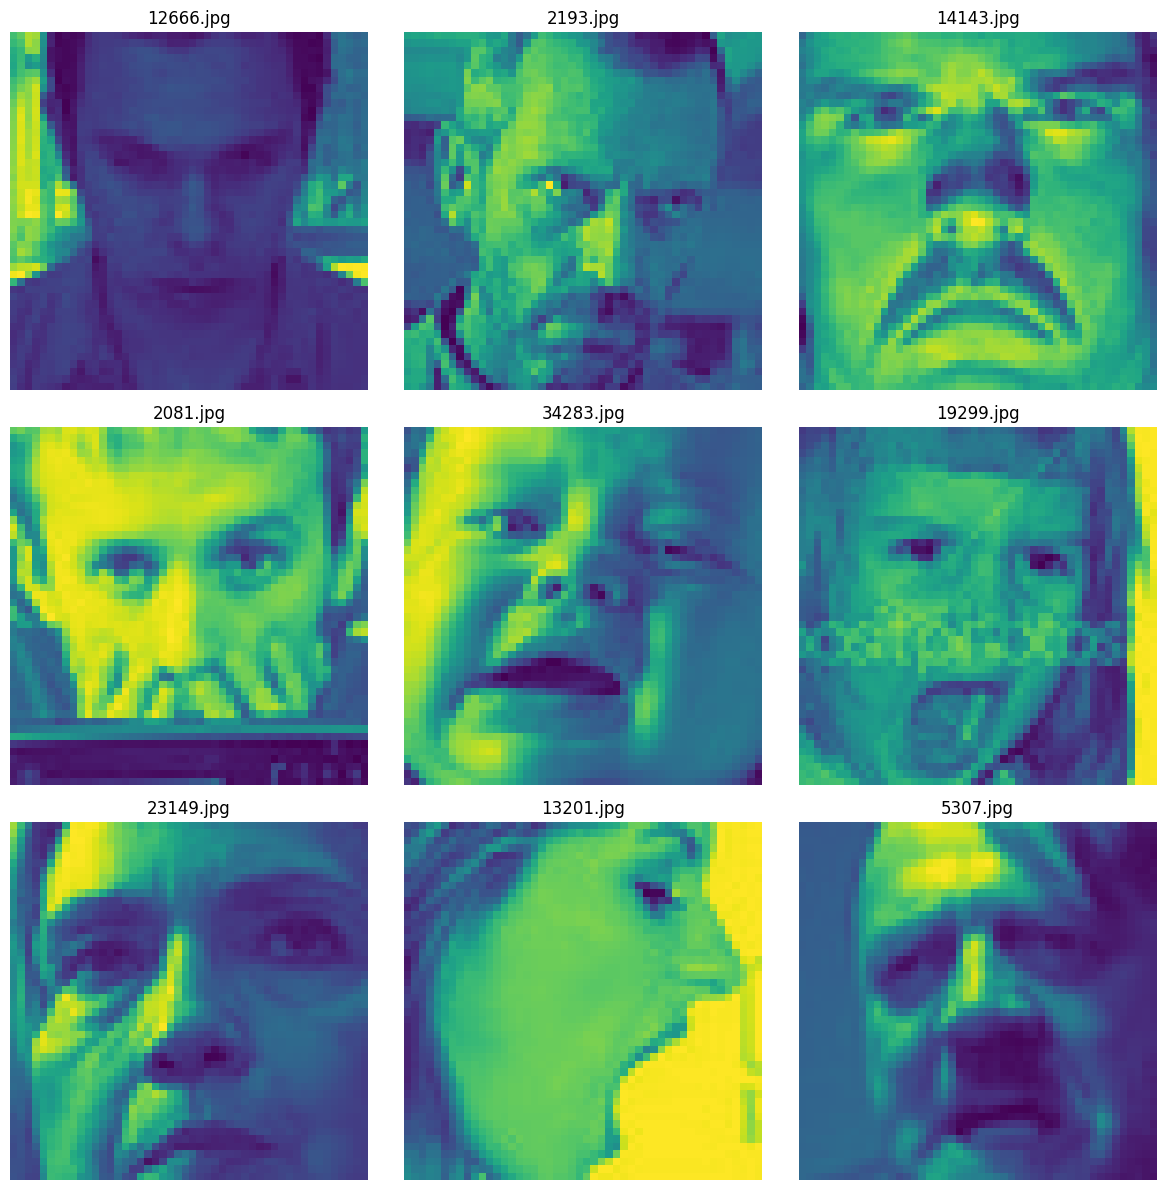

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the directory containing images
folder_path = "/kaggle/input/face-expression-recognition-dataset/images/train/angry"

# List all files in the directory
files = os.listdir(folder_path)

# Define the size to resize the images
picture_size = 48

# Display a grid of images
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display the first 9 images
    plt.subplot(3, 3, i)
    
    # Construct the full path to the image file
    img_path = os.path.join(folder_path, files[i])
    
    # Open the image using PIL
    img = Image.open(img_path)
    
    # Resize the image to the specified size
    img_resized = img.resize((picture_size, picture_size))
    
    # Display the resized image using Matplotlib
    plt.imshow(img_resized)
    plt.title(files[i])  # Set the title of the image as the filename
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

# Setup ImageDataGenerator for Face Expression Recognition Dataset

In [9]:
#Configure ImageDataGenerator objects for training and validation sets. Includes pixel rescaling, augmentation, and directory flow setup.


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and parameters
folder_path = "/kaggle/input/face-expression-recognition-dataset/images/"
picture_size = 48
batch_size = 32

# Initialize ImageDataGenerator for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Initialize ImageDataGenerator for validation set (only rescaling)
datagen_val = ImageDataGenerator(rescale=1./255)

# Flow training images in batches from directory
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",  # Load images in grayscale mode
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical labels for multi-class classification
    shuffle=True  # Shuffle the training data
)

# Flow validation images in batches from directory
test_set = datagen_val.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the validation data
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Define a Convolutional Neural Network (CNN) for multi-class classification of facial expressions.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Number of classes in the dataset
num_classes = 7

# Initialize a sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the second convolutional layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the third convolutional layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the feature maps to transition to fully connected layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Add the second fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Add the output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with Adam optimizer and categorical cross-entropy loss
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,000,327 (11.45 MB)

 Trainable params: 2,997,895 (11.44 MB)

 Non-trainable params: 2,432 (9.50 KB)

# Train the emotion detection model with callbacks for checkpointing and early stopping.


In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define paths and parameters
checkpoint_path = "/kaggle/working/emotion-detect.keras"
epochs = 20

# Define the checkpoint callback to save the best model
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with early stopping and checkpoint callbacks
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
    callbacks=[checkpoint, early_stopping]  # Use both callbacks
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.2612 - loss: 1.9241
Epoch 1: val_accuracy improved from -inf to 0.41349, saving model to /kaggle/working/emotion-detect.keras
900/900 ━━━━━━━━━━━━━━━━━━━━ 407s 446ms/step - accuracy: 0.2612 - loss: 1.9240 - val_accuracy: 0.4135 - val_loss: 1.5411
Epoch 2/20
  1/900 ━━━━━━━━━━━━━━━━━━━━ 6:11 413ms/step - accuracy: 0.2812 - loss: 1.6088

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.41349 to 0.53846, saving model to /kaggle/working/emotion-detect.keras
900/900 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2812 - loss: 1.6088 - val_accuracy: 0.5385 - val_loss: 1.3750
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.4099 - loss: 1.5113
Epoch 3: val_accuracy did not improve from 0.53846
900/900 ━━━━━━━━━━━━━━━━━━━━ 388s 431ms/step - accuracy: 0.4099 - loss: 1.5113 - val_accuracy: 0.3950 - val_loss: 1.5928
Epoch 4/20
  1/900 ━━━━━━━━━━━━━━━━━━━━ 5:41 380ms/step - accuracy: 0.4688 - loss: 1.2683
Epoch 4: val_accuracy improved from 0.53846 to 0.84615, saving model to /kaggle/working/emotion-detect.keras
900/900 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.4688 - loss: 1.2683 - val_accuracy: 0.8462 - val_loss: 0.5544
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.4765 - loss: 1.3668
Epoch 5: val_accuracy did not improve from 0.84615
900/900 ━━━━━━━━━━━━━━━━━━━━ 384s 426ms/step - accuracy:

# Plot training and validation accuracy over epochs


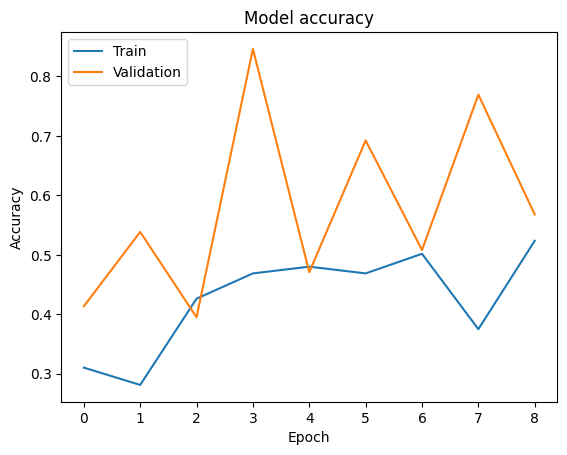

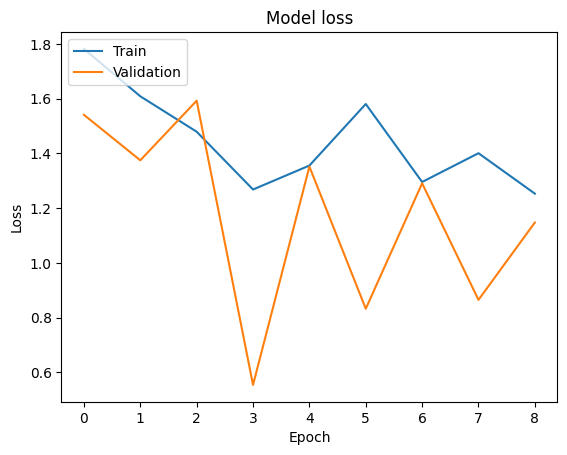

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()